# **Decision Tree**

* A supervised Machine Learning algorithm

* used for both classification and regression tasks

* Models decisions and their possible consequences as a tree-shape graph
* It looks like a Tree, Nodes (points which we ask question), Branches (possible answers), Leaves (final decisions)

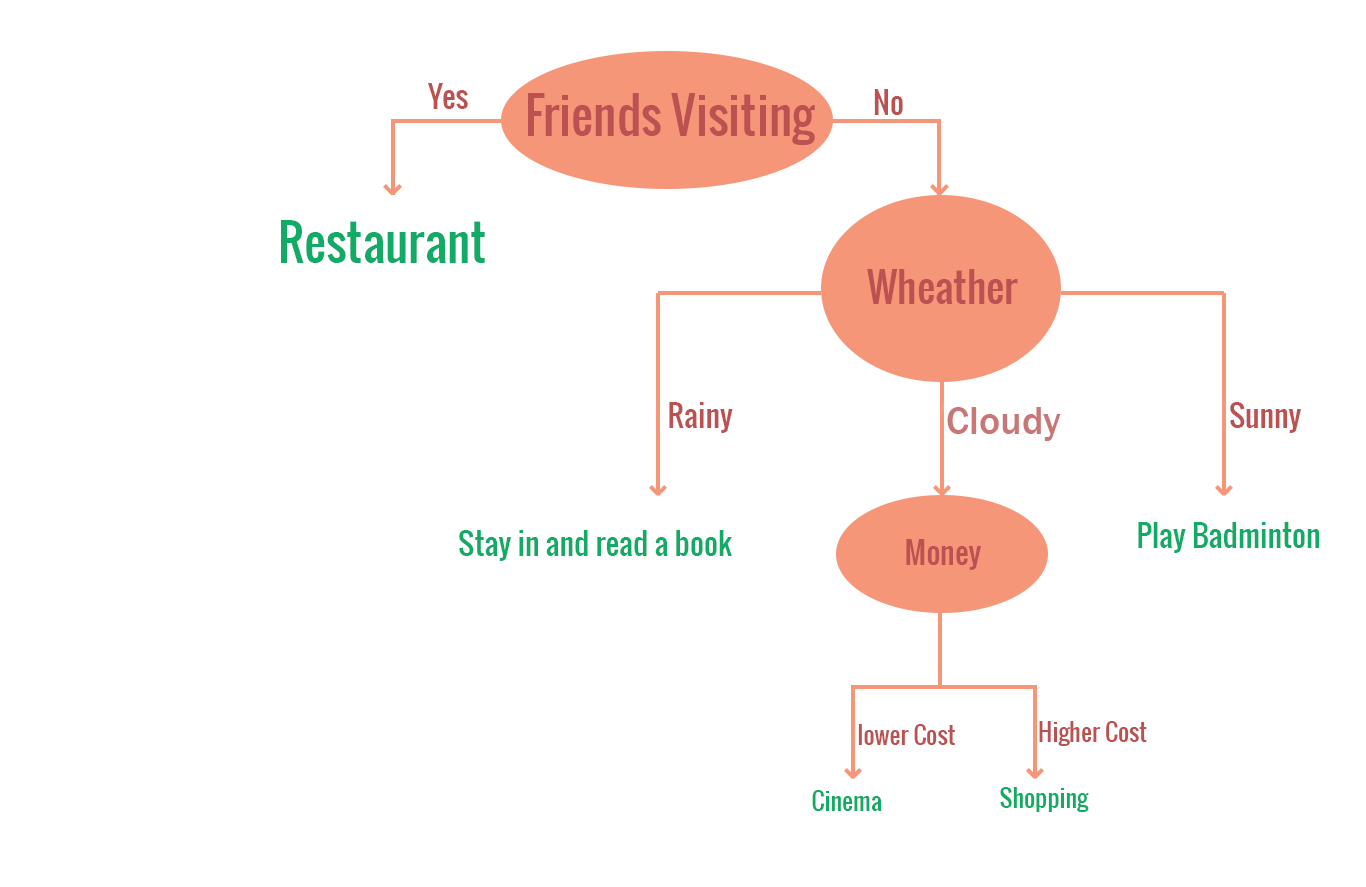

## ***Implementation a Decision Tree in Python by using scikit-learn***

1. Installation and Import Libraries

2. Loading the Dataset (in this example we still using the iris dataset)
3. Train/Test spilit
4. Operation and Train
5. Prediction and Evaluation
6. Visualization (Tree-shape Graph)





---


# ***How It learns ?***

## 1. Select the Best Feature

(for each feature, how well the class separation can occure --------> **Gini impurity**)

## 2. Spilit the data
(Data division in 2 or more groups based on the chosen value of features)

## 3. Repeating

* for each new group, first and second process will repeat for new nodes and branches creation
* Stop until ------> all examples have the same Target (label) or maximum depth or minimum samples per leaf will happen

## 4. Leaves creation
(assigning the class label based on its existed examples)




---


# ***When We Use ?***

* Need of simple Model for Analyse the Data

* Want to understand which Features are Important

* The data is not so noisy and controlling overfitting/underfitting is possible

In [1]:
! pip install scikit-learn   # using common Machine Learning Algorithms
! pip install Pandas         # Data Management
! pip install seaborn        # Statistical Visualization and integrated with pandas

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split # Spilit data into train and test data
from sklearn.tree import DecisionTreeClassifier # build and train the DTC model
from sklearn.metrics import precision_score, classification_report # Evaluation the precision.
import matplotlib.pyplot as plt # Import matplotlib.pyplot
import numpy as np # Mathematical operation

In [3]:
from google.colab import drive
drive.mount('/content/drive') #making the connection between the cloud storage and cloud processors

Mounted at /content/drive


In [5]:
data = pd.read_csv('/content/bank_notes.csv')
data

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [6]:
data.shape

(1372, 5)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   variance  1372 non-null   float64
 1   skewness  1372 non-null   float64
 2   curtosis  1372 non-null   float64
 3   entropy   1372 non-null   float64
 4   Target    1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


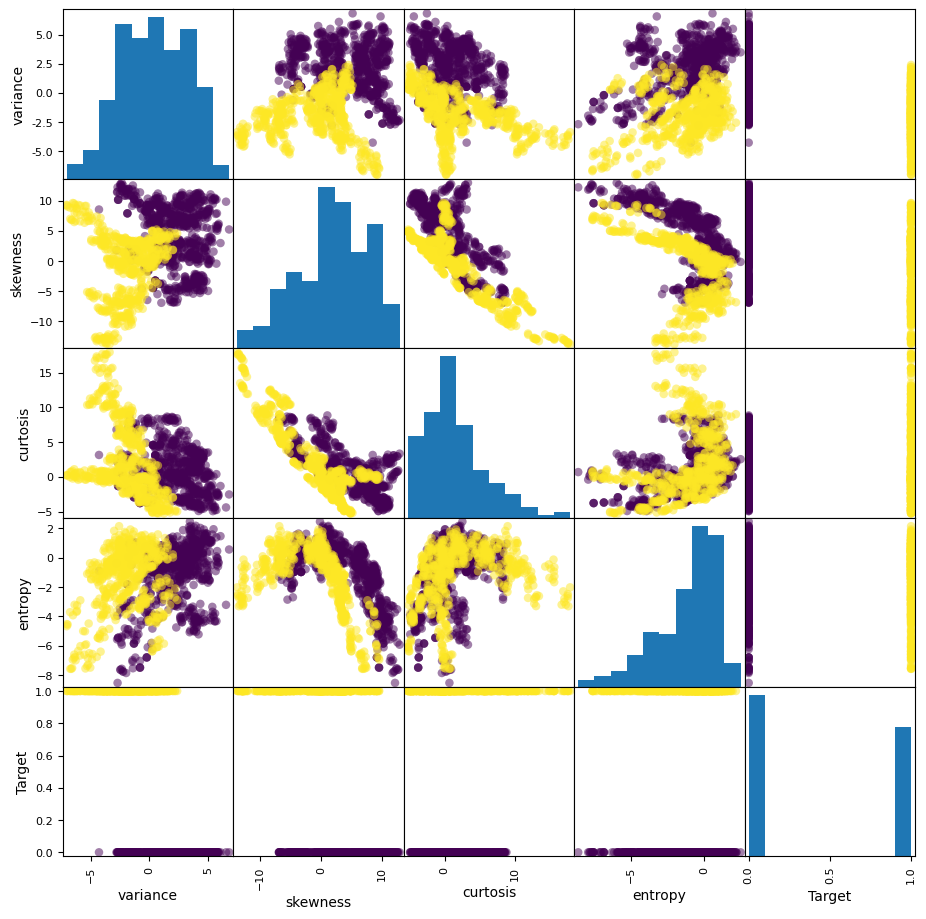

In [8]:
pd.plotting.scatter_matrix(data, c=data['Target'], figsize=[11, 11], s=150) # always use this code to see the associations between columns
plt.show()

In [9]:
X = data[["variance", "skewness", "curtosis", "entropy"]]
y = data["Target"]

In [11]:
target_names_map = {0: 'Authentic', 1: 'Counterfeit'}
target_names_map

{0: 'Authentic', 1: 'Counterfeit'}

* 25% of our samples go into the test set

* Keeping the same proportion of class labels for both test and train data. (stratify)

* random state 42 keeps the exact example spiliting


In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size =0.25, stratify=y, random_state=42)

###**max_depth**:

Restrict the maximum depth of the tree to prevent the model from becoming too complex and overfitting.


###**min_samples_split**:

Set the minimum number of samples required to split an internal node. Increasing this value can result in a less complex model.


###**min_samples_leaf**:

Specify the minimum number of samples a leaf node must have. Larger numbers prevent the model from fitting excessively to the training data.


###**max_features**:

Limit the number of features to consider when looking for the best split; using fewer features can reduce overfitting.


###**max_leaf_nodes**:

Restrict the number of leaf nodes in the tree to simplify the model.


In [ ]:
#from sklearn.tree import DecisionTreeClassifier

#clf = DecisionTreeClassifier(
    #max_depth=4,
    #min_samples_split=10,
    #min_samples_leaf=5,
    #max_features='sqrt',
    #max_leaf_nodes=20,
    #random_state=42
#)

#clf.fit(X_train, y_train)

In [13]:
# 1- Model Creation
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=4, random_state=42)
clf.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [14]:
In [15]: data

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


In [15]:
x_train.shape

(1029, 4)

In [16]:
x_test.shape

(343, 4)

In [17]:
y_train_pred  = clf.predict(x_train)

In [18]:
y_train_pred

array([0, 1, 0, ..., 1, 1, 0])

In [19]:
y_test_pred  = clf.predict(x_test)

In [20]:
y_test_pred

array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,

In [23]:
xnew=[0,0,0,0]
predict2= clf.predict([xnew])
predict2

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [24]:
target_names_map

{0: 'Authentic', 1: 'Counterfeit'}

In [25]:
clf.score(x_train, y_train)

0.9727891156462585

In [26]:
clf.score(x_test, y_test)

0.9708454810495627

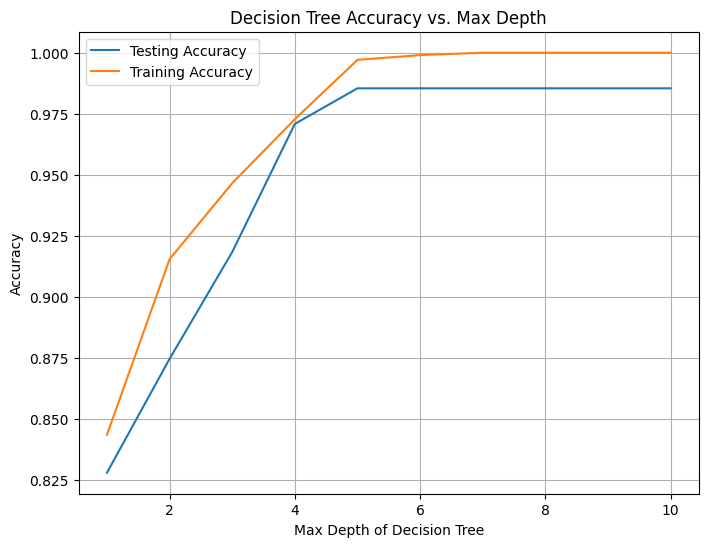

In [27]:
train_accuracy_dtc = clf.score(x_train, y_train)
test_accuracy_dtc = clf.score(x_test, y_test)

# To better assess overfitting/underfitting for Decision Trees, we can plot accuracy vs. max_depth
max_depths = np.arange(1, 11) # Try different max_depth values

train_accuracy_depth = np.empty(len(max_depths))
test_accuracy_depth = np.empty(len(max_depths))

for i, depth in enumerate(max_depths):
    dtc_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dtc_model.fit(x_train, y_train)
    train_accuracy_depth[i] = dtc_model.score(x_train, y_train)
    test_accuracy_depth[i] = dtc_model.score(x_test, y_test)

plt.figure(figsize=(8, 6))
plt.plot(max_depths, test_accuracy_depth, label='Testing Accuracy')
plt.plot(max_depths, train_accuracy_depth, label='Training Accuracy')
plt.legend()
plt.xlabel('Max Depth of Decision Tree')
plt.ylabel('Accuracy')
plt.title('Decision Tree Accuracy vs. Max Depth')
plt.grid(True)
plt.show()


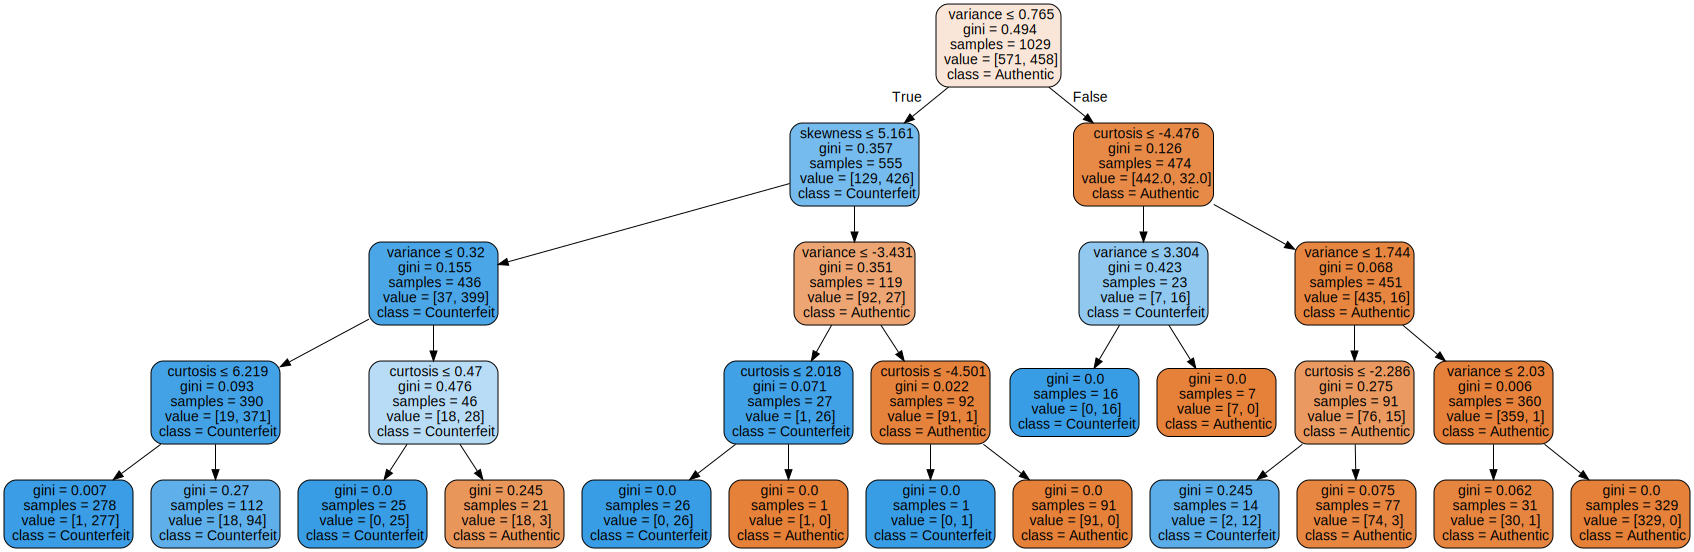

In [28]:
import graphviz
from sklearn.tree import export_graphviz

# Build and render the tree graph
graph = graphviz.Source(export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=["Authentic", "Counterfeit"], filled=True, rounded=True, special_characters=True))
graph.render("decision_tree", format="png", cleanup=True)
graph


# **Random Forest**


---



### 1. Supervised Machine Learning method

### 2. Instead of relying on a single model, it builds many Decision Tree models and aggregates their outputs.

### 3. Combining the predictions of multiple DTC models and produce more accurate overall model.

### 4. Used for both Classification and Regression tasks.



---


## **Key advantages of Random Forest:**

### **1. Reduced Overfitting:**

By building multiple trees and averaging their predictions, Random Forest reduces overfitting compared to individual decision trees.
### **2. Robustness to Noise:**

Random Forest is robust to noise and outliers in the data because it aggregates predictions from multiple trees.
### **3. Feature Importance:**

It can provide estimates of feature importance, which can be useful for feature selection and understanding the data.


In [29]:
import pandas as pd   # Data management
import numpy as np    # Mathemathical operation
from sklearn.model_selection import train_test_split # for quick data split
from sklearn.ensemble import RandomForestRegressor # Fitting many DTC models and average their prediction as the final output
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score # Mesaure how well the regression prediction is near to the real(true) values
from sklearn.metrics import precision_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree # providing utilities for building, visualizing and exporting DTC model

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
data1 = pd.read_csv('/content/bank_notes.csv')
data1

,variance,skewness,curtosis,entropy,Target
0,3.62160,8.66610,-2.8073,-0.44699,0
1,4.54590,8.16740,-2.4586,-1.46210,0
2,3.86600,-2.63830,1.9242,0.10645,0
3,3.45660,9.52280,-4.0112,-3.59440,0
4,0.32924,-4.45520,4.5718,-0.98880,0
...,...,...,...,...,...
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1


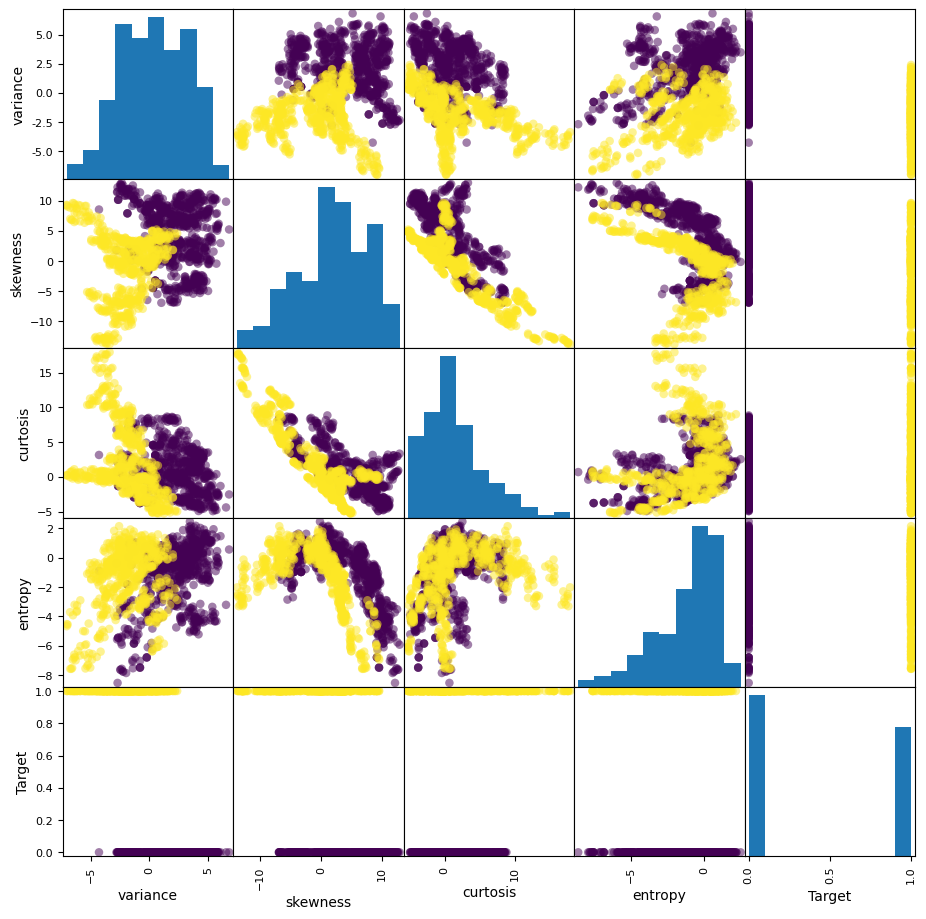

In [32]:
pd.plotting.scatter_matrix(data, c=data['Target'], figsize=[11, 11], s=150) # always use this code to see the associations between columns
plt.show()

In [33]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### **n_estimators=150**

indicates that the Random Forest classifier will consist of 150 decision trees. You can adjust the value of n_estimators according to your specific needs and the characteristics of your dataset. Increasing the number of trees can sometimes improve the performance of the Random Forest but might also increase computation time.


### **max_samples=0.6**

the sample size for each tree is controlled by the max_samples parameter. This parameter specifies the maximum number of samples (or proportion of samples if a float value is provided) to be drawn from the training dataset to train each tree. here is the 60 percent of the total sample in train data.


### **max_features='sqrt':**

max_features controls the number of features to consider when looking for the best split at each node of the decision trees in the random forest. 'sqrt' indicates that the number of features to consider at each split is the square root of the total number of features. Using a smaller number of features at each split can help improve the diversity of the trees and reduce overfitting, especially in high-dimensional datasets.

# ***Note***: by writing the `oob_score=True` we ask:

After everyone studies their slice, how well do they do on the questions they never saw?

In [34]:
from sklearn.ensemble import RandomForestRegressor
rfr =  RandomForestRegressor(n_estimators=150, max_samples=0.6, random_state=42, oob_score=True, max_features='sqrt')
rfr.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', max_samples=0.6, n_estimators=150,
                      oob_score=True, random_state=42)

In [35]:
print("Lenght of training data", len(X_train))
print("lenght of test data", len(X_test))
print("lenght of training Target", len(y_train))
print("lenght of test Target", len(y_test))

Lenght of training data 1029
lenght of test data 343
lenght of training Target 1029
lenght of test Target 343


In [36]:
y_train_pred = rfr.predict(X_train)
y_test_pred  = rfr.predict(X_test)

In [37]:
rfr.oob_score_  #an internal “practice test” on training data only

0.9645555866329221

In [38]:
#total accuracy of test and train of Random Forest Model
print("Train r2 score", r2_score(y_train, rfr.predict(X_train)))
print("Test r2 score", r2_score(y_test, rfr.predict(X_test)))

Train r2 score 0.9895565546794739
Test r2 score 0.9760616224242981


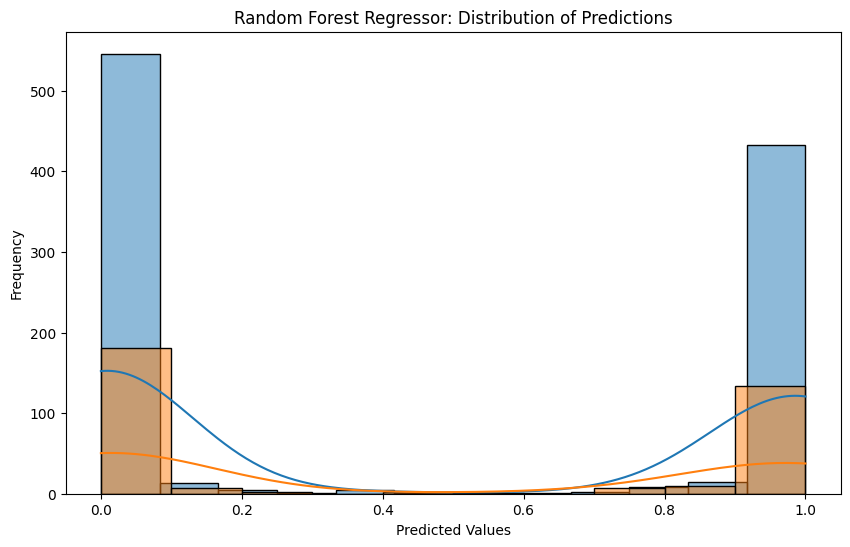

In [39]:
# Distribution of Predictions
plt.figure(figsize=(10, 6))
sns.histplot(y_train_pred, kde=True)
sns.histplot(y_test_pred, kde=True)
plt.xlabel("Predicted Values")
plt.ylabel("Frequency")
plt.title("Random Forest Regressor: Distribution of Predictions")
plt.show()

In [40]:
importances = rfr.feature_importances_
importances

array([0.56346399, 0.23279996, 0.14719689, 0.05653916])

In [41]:
import numpy as np
indices2 = np.argsort(importances)

indices2

array([3, 2, 1, 0])

In [42]:
indices = np.argsort(importances)[::-1] #returns the indices that would sort the importances array in descending order ,and -1 means the reverse
indices

array([0, 1, 2, 3])

In [43]:
importances[indices] #order based on the importances and the data are related to indices

array([0.56346399, 0.23279996, 0.14719689, 0.05653916])

In [44]:
features = X.columns
features[indices]

Index(['variance', 'skewness', 'curtosis', 'entropy'], dtype='object')

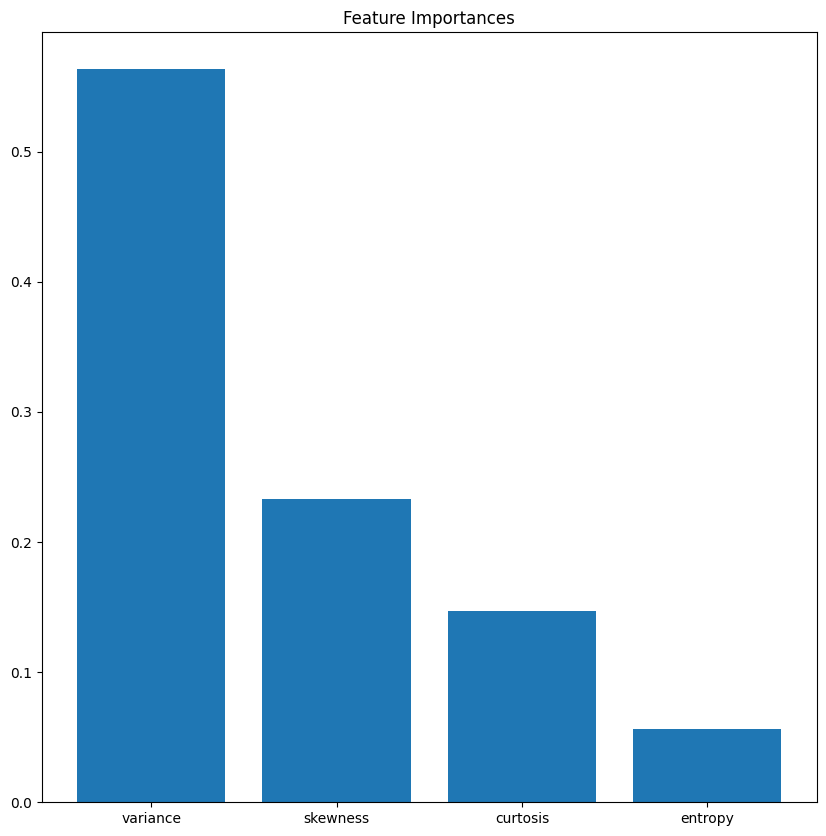

In [45]:
plt.figure(figsize=(10,10))
plt.bar(features, importances)
plt.title('Feature Importances')
plt.show()